# Task 3 Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [8]:
#read in temperature file
temp = pd.read_csv('sensor_storage_temperature.csv')
temp.head()

,Unnamed: 0,id,timestamp,temperature
0,0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


In [114]:
#convert timestamp to date
temp['timestamp']=pd.to_datetime(temp['timestamp'])

In [115]:
#convert timestamp to show only hours and mins and secs to 0
temp['timestamp']=temp['timestamp'].dt.floor('H')
temp.head()

,Unnamed: 0,id,timestamp,temperature
0,0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:00:00,2.96
1,1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:00:00,1.88
2,2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:00:00,1.78
3,3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:00:00,2.18
4,4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:00:00,1.38


In [131]:
#read stock level data in
level = pd.read_csv('sensor_stock_levels.csv')
level.head()

,Unnamed: 0,id,timestamp,product_id,estimated_stock_pct
0,0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [132]:
#convert timestamp to date
level['timestamp']=pd.to_datetime(level['timestamp'])

In [133]:
#convert timestamp to show only hours and mins and secs to 0
level['timestamp']=level['timestamp'].dt.floor('H')

In [155]:
#read sales data in
sales = pd.read_csv('sales.csv')
sales.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [156]:
#convert timestamp to date
sales['timestamp']=pd.to_datetime(sales['timestamp'])

In [157]:
#convert timestamp to show only hours and mins and secs to 0
sales['timestamp']=sales['timestamp'].dt.floor('H')

## Clean tables before merging

In [158]:
#group sales by timestamp, product_id by sum of quantity
grouped_sales = sales.groupby(['timestamp','product_id'])['quantity'].sum().reset_index()

In [159]:
level.head()

,Unnamed: 0,id,timestamp,product_id,estimated_stock_pct
0,0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:00:00,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:00:00,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:00:00,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [160]:
#group stock levels by timestamp, product_id and everage estimated stock %
avg_levels = level.groupby(['timestamp','product_id'])['estimated_stock_pct'].mean().reset_index()

In [161]:
avg_levels

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05
...,...,...,...
10840,2022-03-07 19:00:00,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,0.50
10841,2022-03-07 19:00:00,ed7f6b14-67c9-42a4-8576-c803020eedda,0.26
10842,2022-03-07 19:00:00,edf4ac93-4e14-4a3d-8c60-e715210cf3f9,0.78
10843,2022-03-07 19:00:00,f01b189c-6345-4639-a8d1-89e1fc67c443,0.92


In [162]:
temp.head()

,Unnamed: 0,id,timestamp,temperature
0,0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:00:00,2.96
1,1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:00:00,1.88
2,2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:00:00,1.78
3,3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:00:00,2.18
4,4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:00:00,1.38


In [163]:
#group tempe by timestamp and average temperatures
avg_temp = temp.groupby('timestamp')['temperature'].mean().reset_index()

## Merge tables

In [164]:
#merge grouped_sales and avg_levels together using left join
merge1 = grouped_sales.merge(avg_levels, how='left', on=['timestamp','product_id'])

In [165]:
#merge all 3 tables together now
all = merge1.merge(avg_temp, how='left', on='timestamp')

In [166]:
#replace all na values with 0
all = all.fillna(0)

In [167]:
all

,timestamp,product_id,quantity,estimated_stock_pct,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3,0.89,-0.028850
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3,0.14,-0.028850
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3,0.00,-0.028850
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7,0.00,-0.028850
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11,0.00,-0.028850
...,...,...,...,...,...
6212,2022-03-07 19:00:00,edf4ac93-4e14-4a3d-8c60-e715210cf3f9,3,0.78,-0.165077
6213,2022-03-07 19:00:00,f01b189c-6345-4639-a8d1-89e1fc67c443,3,0.92,-0.165077
6214,2022-03-07 19:00:00,f3bec808-bee0-4597-a129-53a3a2805a43,2,0.01,-0.165077
6215,2022-03-07 19:00:00,fd66ac0b-3498-4613-8ec0-764686b0d864,1,0.00,-0.165077


In [170]:
#going to add categort and unit price to all df
sales1 = sales[['product_id','category','unit_price']]

In [213]:
final =all.merge(sales1, how='left', on= 'product_id')

In [214]:
final

,timestamp,product_id,quantity,estimated_stock_pct,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3,0.89,-0.028850,kitchen,11.19
1,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3,0.89,-0.028850,kitchen,11.19
2,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3,0.89,-0.028850,kitchen,11.19
3,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3,0.89,-0.028850,kitchen,11.19
4,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3,0.89,-0.028850,kitchen,11.19
...,...,...,...,...,...,...,...
229711,2022-03-07 19:00:00,fd77b5cb-498c-40ca-95d1-0f87f13dd0d8,1,0.00,-0.165077,snacks,3.19
229712,2022-03-07 19:00:00,fd77b5cb-498c-40ca-95d1-0f87f13dd0d8,1,0.00,-0.165077,snacks,3.19
229713,2022-03-07 19:00:00,fd77b5cb-498c-40ca-95d1-0f87f13dd0d8,1,0.00,-0.165077,snacks,3.19
229714,2022-03-07 19:00:00,fd77b5cb-498c-40ca-95d1-0f87f13dd0d8,1,0.00,-0.165077,snacks,3.19


In [177]:
final.duplicated().sum()

223499

In [215]:
#drop all duplicates
final = final.drop_duplicates()

In [216]:
final.head()

,timestamp,product_id,quantity,estimated_stock_pct,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3,0.89,-0.02885,kitchen,11.19
38,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3,0.14,-0.02885,vegetables,1.49
114,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3,0.00,-0.02885,baking,5.99
132,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7,0.00,-0.02885,canned foods,2.49
169,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11,0.00,-0.02885,fruit,0.49


In [ ]:
#extract day of week
final['dayofweek']= final['timestamp'].dt.dayofweek

In [ ]:
#extract day
final['day']= final['timestamp'].dt.day

In [ ]:
#extract hour
final['hour']= final['timestamp'].dt.hour

In [220]:
final.head()

,timestamp,product_id,quantity,estimated_stock_pct,temperature,category,unit_price,dayofweek,day,hour
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3,0.89,-0.02885,kitchen,11.19,1,1,9
38,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3,0.14,-0.02885,vegetables,1.49,1,1,9
114,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3,0.00,-0.02885,baking,5.99,1,1,9
132,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7,0.00,-0.02885,canned foods,2.49,1,1,9
169,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11,0.00,-0.02885,fruit,0.49,1,1,9


In [225]:
#convert categories into dummy variables
final = pd.get_dummies(final, columns=['category'],dtype = int)

In [228]:
#get rid of irrelevant columns
final = final.drop(['timestamp','product_id'],axis=1)

In [230]:
final.head()

,quantity,estimated_stock_pct,temperature,unit_price,dayofweek,day,hour,category_baby products,category_baked goods,category_baking,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,3,0.89,-0.02885,11.19,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,3,0.14,-0.02885,1.49,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,1
114,3,0.00,-0.02885,5.99,1,1,9,0,0,1,...,0,0,0,0,0,0,0,0,0,0
132,7,0.00,-0.02885,2.49,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
169,11,0.00,-0.02885,0.49,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Modelling

In [235]:
#define our y and X variables for modelling
y = final['estimated_stock_pct']
X = final.drop(['estimated_stock_pct'],axis=1)
X.shape

(6217, 28)

### Using Random Forest Technique

A random forest is an ensemble learning method that combines the predictions from multiple decision trees to produce a more accurate and stable prediction. It is a type of supervised learning algorithm that can be used for both classification and regression tasks.

We need to approach the Random Forest regression technique like any other machine learning technique. Here's the step-by-step approach:

1. **Design a specific question or data and get the source to determine the required data.**
2. **Make sure the data is in an accessible format; if not, convert it to the required format.**
3. **Specify all noticeable anomalies and missing data points that may be required to achieve the required data.**
4. **Create a machine-learning model.**
5. **Set the baseline model that you want to achieve.**
6. **Train the data machine learning model.**
7. **Provide an insight into the model with test data.**
8. **Compare the performance metrics of both the test data and the predicted data from the model.**
9. **If it doesn’t satisfy your expectations, you can try improving your model accordingly, update your data, or use another data modeling technique.**
10. **Interpret the data you have gained and report accordingly.**

This extract is from [GeeksforGeeks - Random Forest Regression in Python](https://www.geeksforgeeks.org/random-forest-regression-in-python). I will be using this to help me with code and understandig the technique.
ordingly. 


Up to step 4 now.  
### Sklearn Modules and Functions

- **sklearn**: This library is the core machine learning library in Python. It provides a wide range of tools for preprocessing, modeling, evaluating, and deploying machine learning models.
- **RandomForestRegressor**: This is the regression model based upon the Random Forest model or ensemble learning. We will be using this in the article using the sklearn library.
- **LabelEncoder**: This class is used to encode categorical data into numerical values.
- **KNNImputer**: This class is used to impute missing values in a dataset using a k-nearest neighbors approach.
- **train_test_split**: This function is used to split a dataset into training and testing sets.
- **StandardScaler**: This class is used to standardize features by removing the mean and scaling to unit variance.
- **f1_score**: This function is used to evaluate the performance of a classification model using the F1 score.
- **RandomForestRegressor**: This class is used to train a random forest regression model.
- **cross_val_score**: This function is used to perform k-fold cross-validation to evaluate the performance of a model.
f a model

In [241]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# X and y are feature matrix and target vector
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define the number of models to train
k = 10

# Initialize lists to store performance metrics
mse_list = []
r2_list = []

# Loop to train k Random Forest models
for i in range(k):
    # Initialize the Random Forest Regressor with a different random state
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=i)
    
    # Train the model
    rf_regressor.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = rf_regressor.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append the metrics to the lists
    mse_list.append(mse)
    r2_list.append(r2)
    
    print(f'Model {i+1}:')
    print(f'  Mean Squared Error: {mse}')
    print(f'  R-squared: {r2}')
    print()

# Calculate the average performance across all k models
average_mse = np.mean(mse_list)
average_r2 = np.mean(r2_list)

print(f'Average Mean Squared Error: {average_mse}')
print(f'Average R-squared: {average_r2}')

Model 1:
  Mean Squared Error: 0.12119857062694167
  R-squared: -0.13636400989577435

Model 2:
  Mean Squared Error: 0.12139727663348825
  R-squared: -0.13822708759728175

Model 3:
  Mean Squared Error: 0.12162976637643677
  R-squared: -0.14040692334278604

Model 4:
  Mean Squared Error: 0.12188078851809205
  R-squared: -0.14276051980839166

Model 5:
  Mean Squared Error: 0.12171041529724823
  R-squared: -0.14116309175775177

Model 6:
  Mean Squared Error: 0.12284449753349543
  R-squared: -0.15179630492905405

Model 7:
  Mean Squared Error: 0.12205258607858013
  R-squared: -0.14437130254053665

Model 8:
  Mean Squared Error: 0.12077237411240299
  R-squared: -0.13236796953193597

Model 9:
  Mean Squared Error: 0.12096646472671437
  R-squared: -0.13418777307929708

Model 10:
  Mean Squared Error: 0.12188695575334355
  R-squared: -0.14281834412219419

Average Mean Squared Error: 0.12163396956567434
Average R-squared: -0.14044633266050036


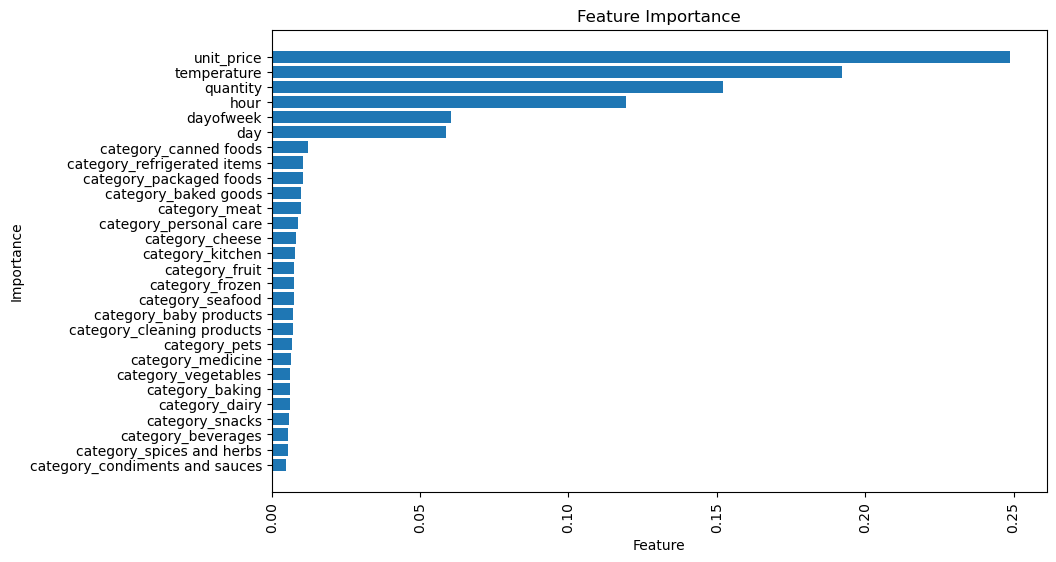

In [254]:
# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Get feature names
feature_names = list(X.columns)

# Sort feature importances and feature names in descending order of importance
sorted_indices = np.argsort(feature_importances)
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

- The MSE suggests that, on average, the models' predictions have a moderate level of error when compared to the actual values.
- The negative R-squared value indicates that the models are performing worse than a simple baseline model that predicts the mean of the target variable.
- These results suggest that the Random Forest models, as currently trained, are not effectively capturing the relationships between the features and the target variable. - - Possible reasons could include inadequate feature selection, insufficient data, or inappropriate model hyperparameters.